In [1]:
###Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
import seaborn as sns
%matplotlib inline

In [2]:
file_path = Path("C:/Users/rodig/Downloads/Pandas-A-Whale-Off-the-Port-folio-/Files/whale_returns.csv")
whale = pd.read_csv(file_path, parse_dates=True, index_col="Date", infer_datetime_format=True)
file_path = Path("C:/Users/rodig/Downloads/Pandas-A-Whale-Off-the-Port-folio-/Files/algo_returns.csv")
algo = pd.read_csv(file_path, parse_dates=True, index_col="Date", infer_datetime_format=True)
file_path = Path("C:/Users/rodig/Downloads/Pandas-A-Whale-Off-the-Port-folio-/Files/sp_tsx_history.csv")
sp_tsx = pd.read_csv(file_path, parse_dates=True, index_col="Date", infer_datetime_format=True)

In [3]:
###Read the Whale Portfolio daily returns and clean the data
whale.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [4]:
###Clean the data
###Whale returns
whale.isnull().mean() * 100

SOROS FUND MANAGEMENT LLC      0.09434
PAULSON & CO.INC.              0.09434
TIGER GLOBAL MANAGEMENT LLC    0.09434
BERKSHIRE HATHAWAY INC         0.09434
dtype: float64

In [5]:
whale.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [6]:
whale = whale.dropna()

In [7]:
whale.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

In [8]:
###Read the algorithmic daily returns and clean the data
algo.head(10)

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN
2014-06-04,-0.001838,NaN
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668


In [9]:
###Clean the data
###Reading algorithmic returns
algo.isnull().mean() * 100
algo = algo.dropna()
algo.isnull().sum()

Algo 1    0
Algo 2    0
dtype: int64

In [10]:
###Read the S&P TSX 60 historic closing prices and create a new daily returns DataFrame from the data.
###Reading S&P TSX 60 Closing Prices
sp_tsx.head()

,Close
Date,
2012-10-01,"$12,370.19"
2012-10-02,"$12,391.23"
2012-10-03,"$12,359.47"
2012-10-04,"$12,447.68"
2012-10-05,"$12,418.99"


In [11]:
###Check Data Types
sp_tsx.dtypes

Close    object
dtype: object

In [12]:
###Fix Data Types
###If any columns have dollar signs or characters other than numeric values, remove those characters and convert the data types as needed.
sp_tsx["Close"] = sp_tsx["Close"].str.replace("$", "")
sp_tsx["Close"] = sp_tsx["Close"].str.replace(",", "")
sp_tsx["Close"] = sp_tsx["Close"].astype("float")

In [13]:
sp_tsx.dtypes

Close    float64
dtype: object

In [14]:
###Convert the S&P TSX 60 closing prices to daily returns.
sp_tsx_daily_return = sp_tsx.pct_change()
sp_tsx_daily_return.head()

,Close
Date,
2012-10-01,NaN
2012-10-02,0.001701
2012-10-03,-0.002563
2012-10-04,0.007137
2012-10-05,-0.002305


In [15]:
###Drop nulls
sp_tsx_daily_return["Close"] = sp_tsx_daily_return["Close"].fillna("")
sp_tsx_daily_return = sp_tsx_daily_return.dropna()
sp_tsx_daily_return.isnull().sum()

Close    0
dtype: int64

In [16]:
###Rename `Close` Column to be specific to this portfolio.
sp_tsx_daily_return = sp_tsx_daily_return.rename(columns={"Close" : "S&P_TSX 60 Closing Prices"})

In [17]:
###Join Whale Returns, Algorithmic Returns, and the S&P TSX 60 Returns into a single DataFrame 
###with columns for each portfolio's returns.
portfolios = pd.concat([whale, algo, sp_tsx_daily_return], axis="columns", join="inner")
portfolios.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P_TSX 60 Closing Prices
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.00852985
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.00337059
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.00134391
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.00997212
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,-0.00655476


In [18]:
portfolios = portfolios.sort_index(ascending=True)
portfolios.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P_TSX 60 Closing Prices
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.00852985
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.00337059
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.00134391
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.00997212
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,-0.00655476


In [19]:
portfolios.dtypes

SOROS FUND MANAGEMENT LLC      float64
PAULSON & CO.INC.              float64
TIGER GLOBAL MANAGEMENT LLC    float64
BERKSHIRE HATHAWAY INC         float64
Algo 1                         float64
Algo 2                         float64
S&P_TSX 60 Closing Prices       object
dtype: object

In [20]:
portfolios["S&P_TSX 60 Closing Prices"] = portfolios["S&P_TSX 60 Closing Prices"].astype("float")

In [21]:
portfolios.dtypes

SOROS FUND MANAGEMENT LLC      float64
PAULSON & CO.INC.              float64
TIGER GLOBAL MANAGEMENT LLC    float64
BERKSHIRE HATHAWAY INC         float64
Algo 1                         float64
Algo 2                         float64
S&P_TSX 60 Closing Prices      float64
dtype: object

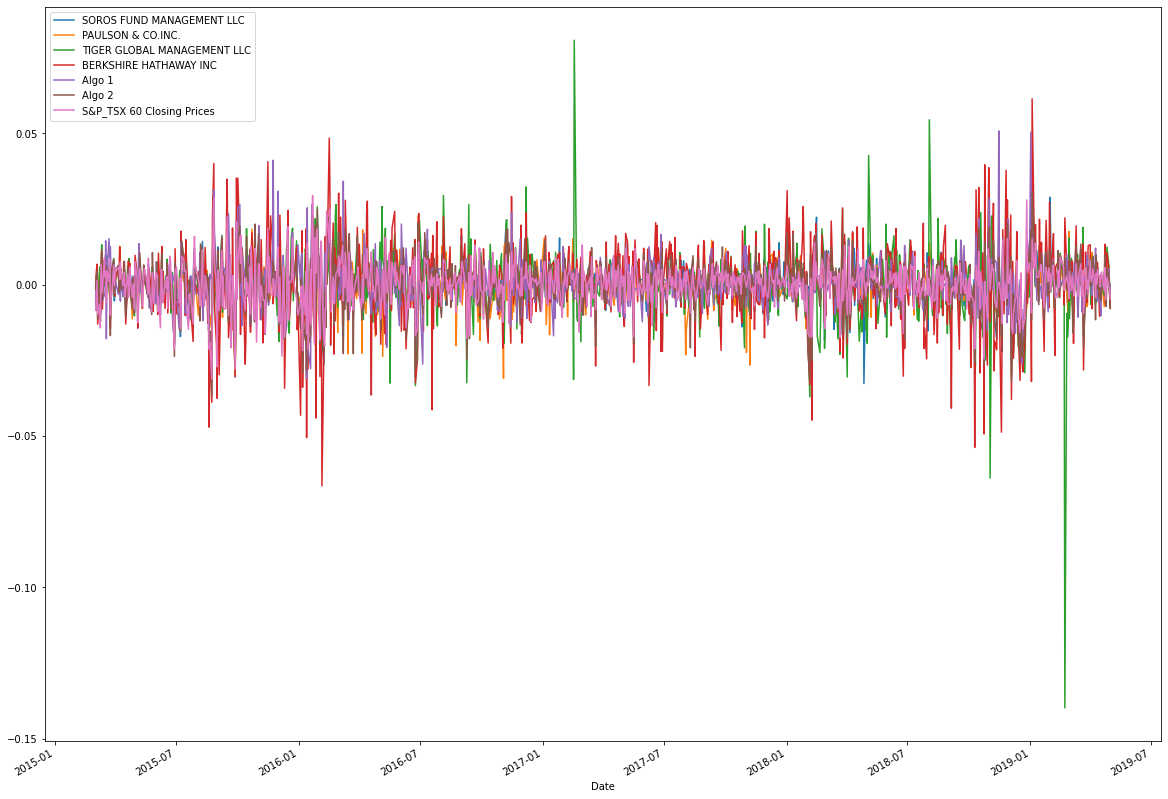

In [22]:
###plot daily returns for all portfolios
portfolios.plot(figsize=(20,15))

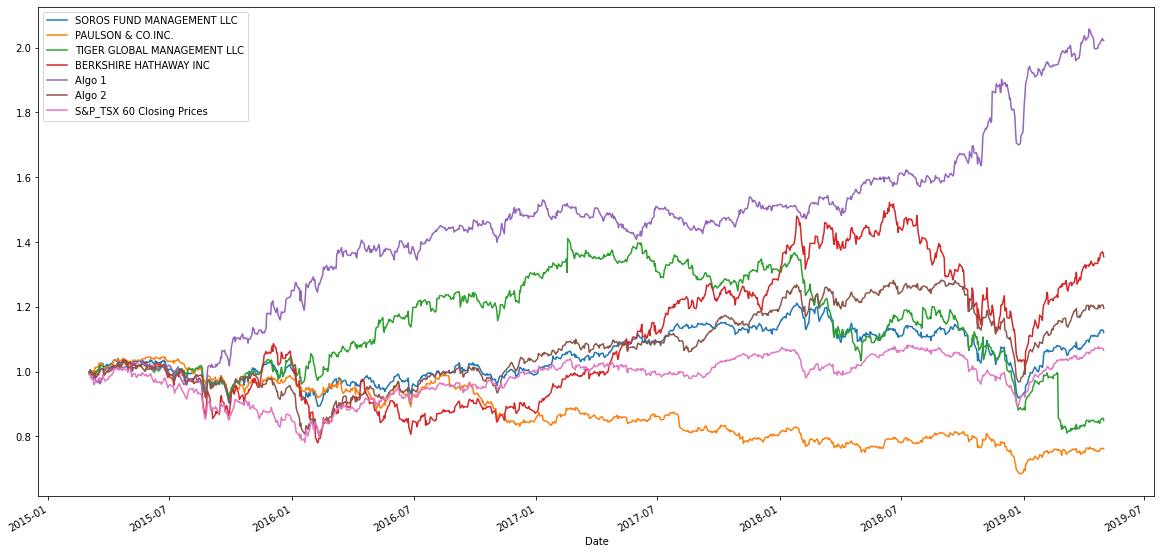

In [23]:
###Calculate and plot cumulative returns for all portfolios. Does any portfolio outperform the S&P TSX 60?
cumulative = (1 + portfolios).cumprod()
cumulative.plot(figsize=(20,10))

In [24]:
print("The portfolios that didn't outperform the S&P TSX 60 were PAULSON & CO.INC. and TIGER GLOBAL MANAGEMENT LLC")

The portfolios that didn't outperform the S&P TSX 60 were PAULSON & CO.INC. and TIGER GLOBAL MANAGEMENT LLC


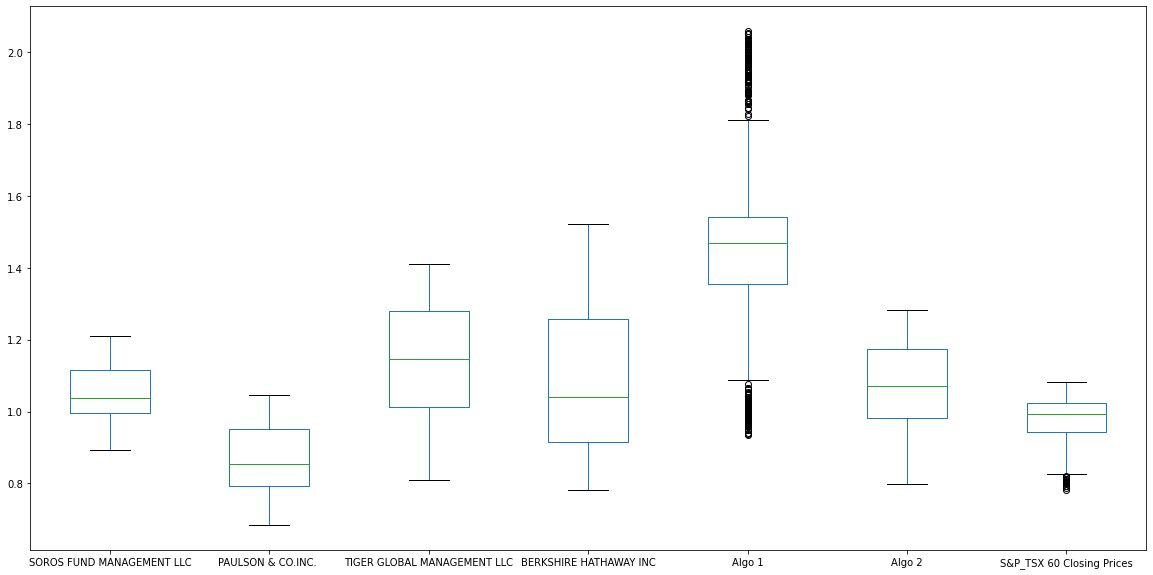

In [25]:
###Create a box plot for each of the returns.
cumulative.plot.box(figsize=(20,10))

In [26]:
###Calculate the standard deviation for each portfolio.
portfolios_std = portfolios.std()
portfolios_std.head(7)

SOROS FUND MANAGEMENT LLC      0.007828
PAULSON & CO.INC.              0.006982
TIGER GLOBAL MANAGEMENT LLC    0.010883
BERKSHIRE HATHAWAY INC         0.012826
Algo 1                         0.007589
Algo 2                         0.008326
S&P_TSX 60 Closing Prices      0.007034
dtype: float64

In [27]:
###Determine which portfolios are riskier than the S&P TSX 60
portfolios_std.sort_values()

PAULSON & CO.INC.              0.006982
S&P_TSX 60 Closing Prices      0.007034
Algo 1                         0.007589
SOROS FUND MANAGEMENT LLC      0.007828
Algo 2                         0.008326
TIGER GLOBAL MANAGEMENT LLC    0.010883
BERKSHIRE HATHAWAY INC         0.012826
dtype: float64

In [28]:
###Calculate the Annualized Standard Deviation (252 trading days).
annualized_std = portfolios * np.sqrt(252)
annualized_std.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P_TSX 60 Closing Prices
Date,,,,,,,
2015-03-03,-0.020089,-0.079063,-0.007866,-0.104274,-0.030830,-0.015073,-0.135407
2015-03-04,0.035399,0.051454,-0.040226,0.066880,-0.136343,0.038356,-0.053506
2015-03-05,0.063752,0.064705,0.037379,0.106777,-0.015161,0.068628,0.021334
2015-03-06,-0.125494,-0.056736,-0.134634,-0.207925,-0.078686,-0.181927,-0.158302
2015-03-09,0.009243,0.067076,0.092751,-0.026232,-0.086469,0.020688,-0.104054


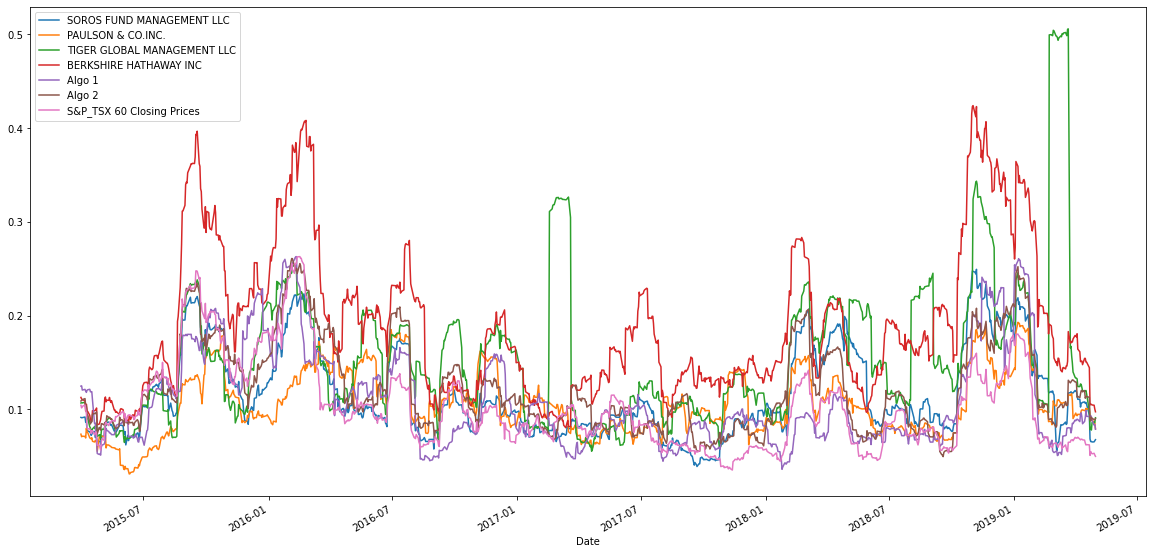

In [29]:
###Calculate the rolling standard deviation for all portfolios using a 21-day window
annualized_std.rolling(window=21).std().plot(figsize=(20,10))

In [30]:
print("The riskier Portifolio is BERKSHIRE HATHAWAY INC ")

The riskier Portifolio is BERKSHIRE HATHAWAY INC 


In [31]:
###Calculate the correlation between each stock 
###to determine which portfolios may mimick the S&P TSX 60.
correlation = portfolios.corr()
correlation

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P_TSX 60 Closing Prices
SOROS FUND MANAGEMENT LLC,1.000000,0.697076,0.560964,0.750181,0.313795,0.826667,0.673930
PAULSON & CO.INC.,0.697076,1.000000,0.433034,0.540033,0.266363,0.674015,0.486511
TIGER GLOBAL MANAGEMENT LLC,0.560964,0.433034,1.000000,0.423524,0.161236,0.506689,0.440583
BERKSHIRE HATHAWAY INC,0.750181,0.540033,0.423524,1.000000,0.289378,0.684609,0.557250
Algo 1,0.313795,0.266363,0.161236,0.289378,1.000000,0.285455,0.310276
Algo 2,0.826667,0.674015,0.506689,0.684609,0.285455,1.000000,0.737370
S&P_TSX 60 Closing Prices,0.673930,0.486511,0.440583,0.557250,0.310276,0.737370,1.000000


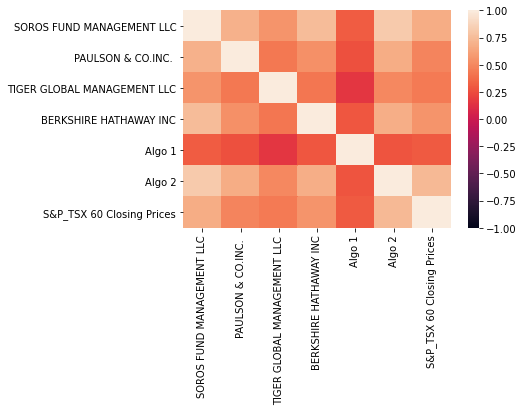

In [32]:
###plot the correlation between each stock
sns.heatmap(correlation, vmin=-1, vmax=1)

In [33]:
###Choose one portfolio, then calculate and plot beta it and the S&P 60 TSX.
###Calculate covariance of a single portfolio
covariance_berkshire = portfolios['BERKSHIRE HATHAWAY INC'].cov(portfolios['S&P_TSX 60 Closing Prices'])
print(f'BERKSHIRE HATHAWAY INC covariance returns vs S&P TSX 60 is: {covariance_berkshire}')

BERKSHIRE HATHAWAY INC covariance returns vs S&P TSX 60 is: 5.027336077110027e-05


In [34]:
###Calculate variance of S&P TSX
variance_berkshire = portfolios['S&P_TSX 60 Closing Prices'].var()
print(f"Variance of S&P TSX 60 is : {variance_berkshire}")

Variance of S&P TSX 60 is : 4.9479515915131015e-05


In [35]:
###Calculating beta of Algo 1
###Plot beta trend
beta_berkshire = covariance_berkshire / variance_berkshire
print(f'Beta of BERKSHIRE HATHAWAY INC is: {beta_berkshire}')

Beta of BERKSHIRE HATHAWAY INC is: 1.016043909106364


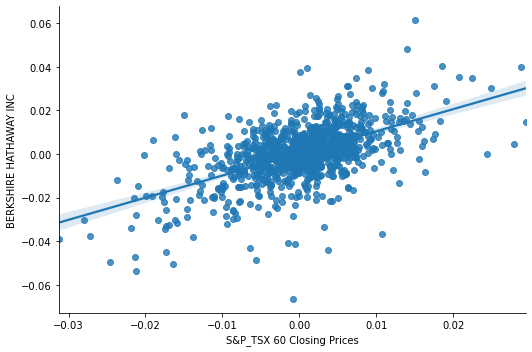

In [36]:
sns.lmplot(x="S&P_TSX 60 Closing Prices", y="BERKSHIRE HATHAWAY INC", data=portfolios, aspect=1.5, fit_reg=True)

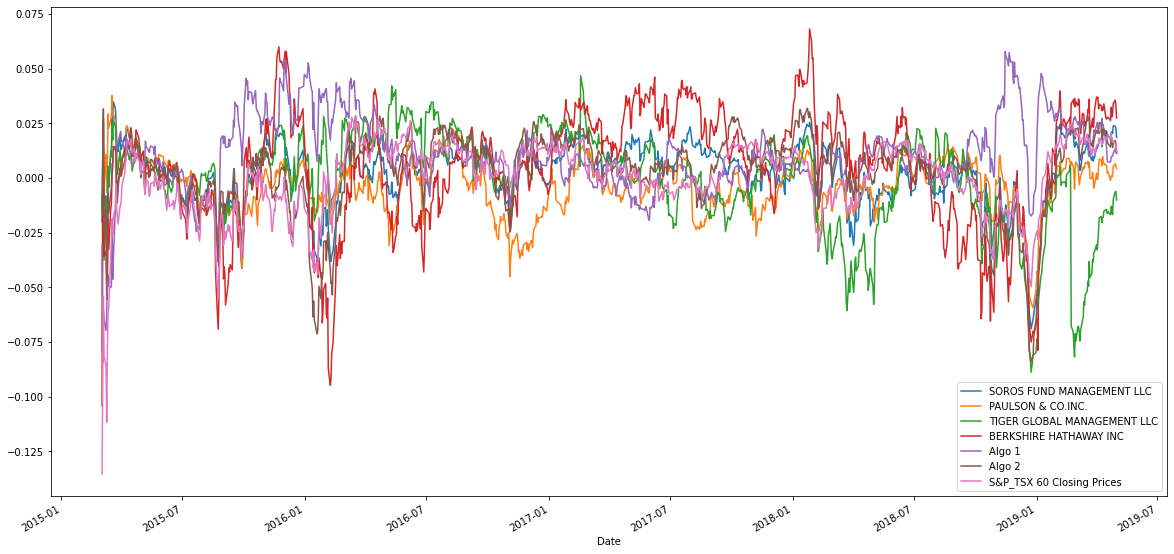

In [37]:
#alternative way to calculate a rolling window is to take the exponentially weighted moving average. 
##This is like a moving window average, but it assigns greater importance to more recent observations. 
##Try calculating the 'EWM' with a 21 day half-life.
annualized_std.ewm(halflife=21).mean().plot(figsize=(20,10))

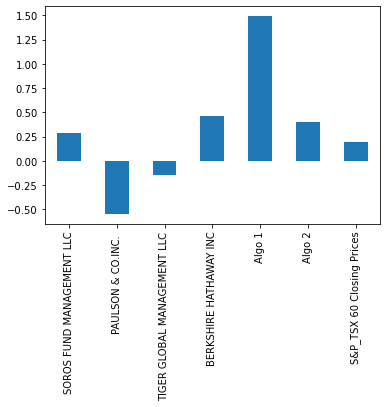

In [38]:
###Annualized Sharpe Ratios
###Visualize the sharpe ratios as a bar plot
sharpe_ratios = (portfolios.mean() * 252) / (portfolios.std() * np.sqrt(252))
sharpe_ratios.plot(kind="bar")

In [39]:
sharpe_ratios.sort_values()

PAULSON & CO.INC.             -0.547594
TIGER GLOBAL MANAGEMENT LLC   -0.144455
S&P_TSX 60 Closing Prices      0.195550
SOROS FUND MANAGEMENT LLC      0.286709
Algo 2                         0.396817
BERKSHIRE HATHAWAY INC         0.467045
Algo 1                         1.491514
dtype: float64

In [40]:
###Determine whether the algorithmic strategies outperform both the market 
###(S&P TSX 60) and the whales portfolios.
###Write your answer here!
print("The algorithmic 1 outperformed both the market (S&P TSX 60) and the whales portfolios")

The algorithmic 1 outperformed both the market (S&P TSX 60) and the whales portfolios


In [41]:
###Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a 
file_path = Path("C:/Users/rodig/Downloads/Pandas-A-Whale-Off-the-Port-folio-/Files/shop_historical.csv")
shop = pd.read_csv(file_path, parse_dates=True, index_col="Date", infer_datetime_format=True)
file_path = Path("C:/Users/rodig/Downloads/Pandas-A-Whale-Off-the-Port-folio-/Files/otex_historical.csv")
otex = pd.read_csv(file_path, parse_dates=True, index_col="Date", infer_datetime_format=True)
file_path = Path("C:/Users/rodig/Downloads/Pandas-A-Whale-Off-the-Port-folio-/Files/l_historical.csv")
lob = pd.read_csv(file_path, parse_dates=True, index_col="Date", infer_datetime_format=True)

In [42]:
###Reading data from Shopfy stock
shop.head()

,Symbol,Close
Date,,
2018-01-02,SHOP,132.06
2018-01-03,SHOP,135.15
2018-01-04,SHOP,137.46
2018-01-05,SHOP,137.26
2018-01-08,SHOP,139.51


In [43]:
shop = shop.rename(columns={"Close" : "Shop"})
shop.head()

,Symbol,Shop
Date,,
2018-01-02,SHOP,132.06
2018-01-03,SHOP,135.15
2018-01-04,SHOP,137.46
2018-01-05,SHOP,137.26
2018-01-08,SHOP,139.51


In [44]:
###Reading data from Open Text stock
otex.head()

,Symbol,Close
Date,,
2018-01-02,OTEX,43.58
2018-01-03,OTEX,43.07
2018-01-04,OTEX,42.91
2018-01-05,OTEX,42.57
2018-01-08,OTEX,42.16


In [45]:
otex = otex.rename(columns={"Close" : "Otex"})
otex.head()

,Symbol,Otex
Date,,
2018-01-02,OTEX,43.58
2018-01-03,OTEX,43.07
2018-01-04,OTEX,42.91
2018-01-05,OTEX,42.57
2018-01-08,OTEX,42.16


In [46]:
###Reading data from Loblaw stock
lob.head()

,Symbol,Close
Date,,
2018-01-02,L,57.99
2018-01-03,L,57.41
2018-01-04,L,57.42
2018-01-05,L,57.42
2018-01-08,L,56.86


In [47]:
lob = lob.rename(columns={"Close" : "Loblaw"})
lob.head()

,Symbol,Loblaw
Date,,
2018-01-02,L,57.99
2018-01-03,L,57.41
2018-01-04,L,57.42
2018-01-05,L,57.42
2018-01-08,L,56.86


In [48]:
###Combine all stocks in a single DataFrame
three_portfolios = pd.concat([shop, otex, lob], axis="columns", join="inner")
three_portfolios.head()

,Symbol,Shop,Symbol,Otex,Symbol,Loblaw
Date,,,,,,
2018-01-02,SHOP,132.06,OTEX,43.58,L,57.99
2018-01-03,SHOP,135.15,OTEX,43.07,L,57.41
2018-01-04,SHOP,137.46,OTEX,42.91,L,57.42
2018-01-05,SHOP,137.26,OTEX,42.57,L,57.42
2018-01-08,SHOP,139.51,OTEX,42.16,L,56.86


In [49]:
###Reorganize portfolio data by having a column per symbol
three_portfolios = three_portfolios.drop(columns=["Symbol"])
three_portfolios

,Shop,Otex,Loblaw
Date,,,
2018-01-02,132.06,43.58,57.99
2018-01-03,135.15,43.07,57.41
2018-01-04,137.46,42.91,57.42
2018-01-05,137.26,42.57,57.42
2018-01-08,139.51,42.16,56.86
...,...,...,...
2019-12-20,513.22,58.68,67.90
2019-12-23,511.62,57.89,67.68
2019-12-24,525.39,57.44,67.67


In [50]:
three_portfolios.sort_index()

,Shop,Otex,Loblaw
Date,,,
2018-01-02,132.06,43.58,57.99
2018-01-03,135.15,43.07,57.41
2018-01-04,137.46,42.91,57.42
2018-01-05,137.26,42.57,57.42
2018-01-08,139.51,42.16,56.86
...,...,...,...
2019-12-20,513.22,58.68,67.90
2019-12-23,511.62,57.89,67.68
2019-12-24,525.39,57.44,67.67


In [51]:
three_portfolios.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 501 entries, 2018-01-02 to 2019-12-30
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Shop    501 non-null    float64
 1   Otex    501 non-null    float64
 2   Loblaw  501 non-null    float64
dtypes: float64(3)
memory usage: 15.7 KB


In [52]:
three_portfolios.isnull().count()

Shop      501
Otex      501
Loblaw    501
dtype: int64

In [53]:
###Calculate daily returns
three_portfolios_daily_returns = three_portfolios.pct_change()
three_portfolios_daily_returns

,Shop,Otex,Loblaw
Date,,,
2018-01-02,NaN,NaN,NaN
2018-01-03,0.023398,-0.011703,-0.010002
2018-01-04,0.017092,-0.003715,0.000174
2018-01-05,-0.001455,-0.007924,0.000000
2018-01-08,0.016392,-0.009631,-0.009753
...,...,...,...
2019-12-20,-0.005503,0.024441,0.003547
2019-12-23,-0.003118,-0.013463,-0.003240
2019-12-24,0.026915,-0.007773,-0.000148


In [54]:
###Drop NAs
three_portfolios_daily_returns = three_portfolios_daily_returns.dropna()

In [55]:
three_portfolios_daily_returns.isnull().sum

<bound method DataFrame.sum of              Shop   Otex  Loblaw
Date                            
2018-01-03  False  False   False
2018-01-04  False  False   False
2018-01-05  False  False   False
2018-01-08  False  False   False
2018-01-09  False  False   False
...           ...    ...     ...
2019-12-20  False  False   False
2019-12-23  False  False   False
2019-12-24  False  False   False
2019-12-27  False  False   False
2019-12-30  False  False   False

[500 rows x 3 columns]>

In [56]:
###Display sample data
three_portfolios_daily_returns.sample()

,Shop,Otex,Loblaw
Date,,,
2018-01-03,0.023398,-0.011703,-0.010002


In [57]:
###Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
#Set weights
##Calculate portfolio return
###Display sample data
weights = [0.33, 0.33, 0.33]

three_portfolios_returns = three_portfolios_daily_returns.dot(weights)
three_portfolios_returns.head()

Date
2018-01-03    0.000559
2018-01-04    0.004472
2018-01-05   -0.003095
2018-01-08   -0.000987
2018-01-09   -0.000989
dtype: float64

In [58]:
###Join your portfolio returns to the DataFrame that contains all of the portfolio returns
all_portfolios = pd.concat([portfolios, three_portfolios_returns], axis="columns", join="inner")
all_portfolios.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P_TSX 60 Closing Prices,0
Date,,,,,,,,
2018-01-03,0.004658,0.000027,0.001979,0.005676,-0.000890,0.008175,0.003774,0.000559
2018-01-04,-0.000914,0.004196,0.010743,0.004065,-0.000914,0.004294,0.002528,0.004472
2018-01-05,0.004072,0.000823,0.000737,0.022023,-0.003839,0.006405,-0.003869,-0.003095
2018-01-08,0.004473,-0.003739,0.005085,0.003435,0.001653,0.000658,-0.001944,-0.000987
2018-01-09,-0.001028,0.000872,0.001789,0.000708,-0.001004,-0.002091,0.000097,-0.000989


In [59]:
all_portfolios.columns

Index([  'SOROS FUND MANAGEMENT LLC',          'PAULSON & CO.INC. ',
       'TIGER GLOBAL MANAGEMENT LLC',      'BERKSHIRE HATHAWAY INC',
                            'Algo 1',                      'Algo 2',
         'S&P_TSX 60 Closing Prices',                             0],
      dtype='object')

In [60]:
all_portfolios = all_portfolios.rename(columns={0 : "My Portfolio"})
all_portfolios.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P_TSX 60 Closing Prices,My Portfolio
Date,,,,,,,,
2018-01-03,0.004658,0.000027,0.001979,0.005676,-0.000890,0.008175,0.003774,0.000559
2018-01-04,-0.000914,0.004196,0.010743,0.004065,-0.000914,0.004294,0.002528,0.004472
2018-01-05,0.004072,0.000823,0.000737,0.022023,-0.003839,0.006405,-0.003869,-0.003095
2018-01-08,0.004473,-0.003739,0.005085,0.003435,0.001653,0.000658,-0.001944,-0.000987
2018-01-09,-0.001028,0.000872,0.001789,0.000708,-0.001004,-0.002091,0.000097,-0.000989


In [61]:
###Only compare dates where return data exists for all the stocks (drop NaNs)
all_portfolios = all_portfolios.dropna()
all_portfolios.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
Algo 1                         0
Algo 2                         0
S&P_TSX 60 Closing Prices      0
My Portfolio                   0
dtype: int64

In [62]:
###Calculate the annualized `std`
all_portfolios_std = all_portfolios * np.sqrt(252)
all_portfolios_std.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P_TSX 60 Closing Prices,My Portfolio
Date,,,,,,,,
2018-01-03,0.073936,0.000430,0.031413,0.090108,-0.014132,0.129775,0.059916,0.008875
2018-01-04,-0.014515,0.066617,0.170537,0.064527,-0.014511,0.068170,0.040133,0.070990
2018-01-05,0.064634,0.013069,0.011695,0.349600,-0.060946,0.101676,-0.061417,-0.049130
2018-01-08,0.071000,-0.059350,0.080723,0.054528,0.026247,0.010442,-0.030867,-0.015672
2018-01-09,-0.016311,0.013847,0.028401,0.011244,-0.015939,-0.033187,0.001547,-0.015694


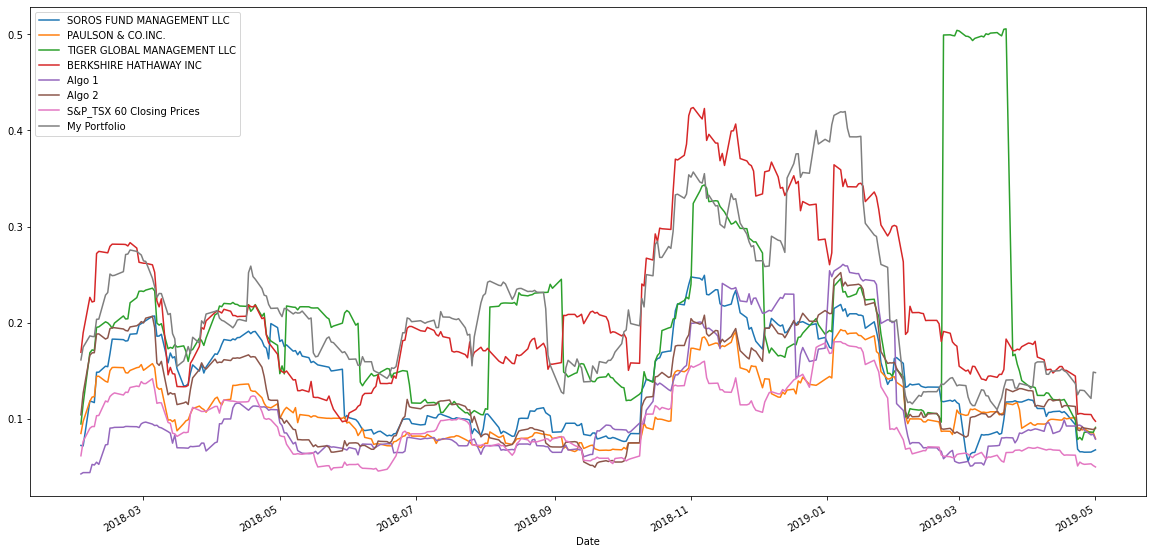

In [63]:
###Calculate rolling standard deviation with 21-day window
###Plot rolling standard deviation
all_portfolios_std.rolling(window=21).std().plot(figsize=(20,10))

In [64]:
###Calculate and plot the correlation
all_correlation = all_portfolios_std.corr()
all_correlation

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P_TSX 60 Closing Prices,My Portfolio
SOROS FUND MANAGEMENT LLC,1.000000,0.764174,0.526710,0.782414,0.305525,0.834431,0.686681,0.556093
PAULSON & CO.INC.,0.764174,1.000000,0.536534,0.647407,0.320568,0.797494,0.623728,0.385305
TIGER GLOBAL MANAGEMENT LLC,0.526710,0.536534,1.000000,0.384316,0.130845,0.485258,0.438781,0.303971
BERKSHIRE HATHAWAY INC,0.782414,0.647407,0.384316,1.000000,0.294696,0.783254,0.649817,0.647413
Algo 1,0.305525,0.320568,0.130845,0.294696,1.000000,0.321837,0.284789,0.214770
Algo 2,0.834431,0.797494,0.485258,0.783254,0.321837,1.000000,0.754326,0.563756
S&P_TSX 60 Closing Prices,0.686681,0.623728,0.438781,0.649817,0.284789,0.754326,1.000000,0.579228
My Portfolio,0.556093,0.385305,0.303971,0.647413,0.214770,0.563756,0.579228,1.000000


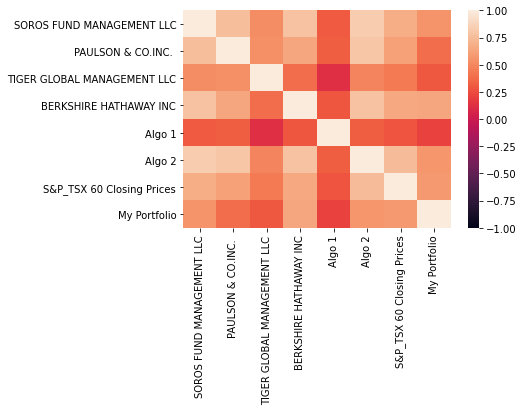

In [65]:
sns.heatmap(all_correlation, vmin=-1, vmax=1)

In [66]:
###Calculate beta for your portfolio compared to the S&P 60 TSX.
my_covariance = all_portfolios['My Portfolio'].cov(all_portfolios['S&P_TSX 60 Closing Prices'])

# Calculate variance of all daily returns
my_variance = all_portfolios['S&P_TSX 60 Closing Prices'].var()

# Calculate beta of all daily returns of MSFT
my_beta = my_covariance / my_variance
print(f'Shopify Beta is: {my_beta}')

Shopify Beta is: 1.2978883698734511


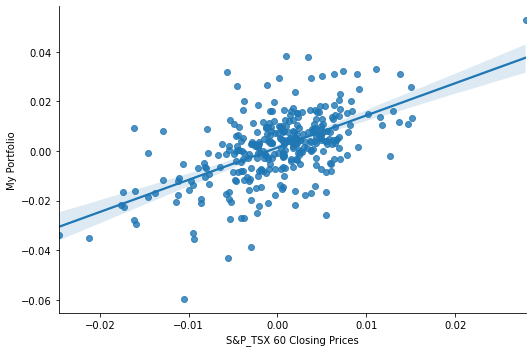

In [67]:
###Plot beta
sns.lmplot(x='S&P_TSX 60 Closing Prices', y='My Portfolio', data=all_portfolios, aspect=1.5, fit_reg=True)

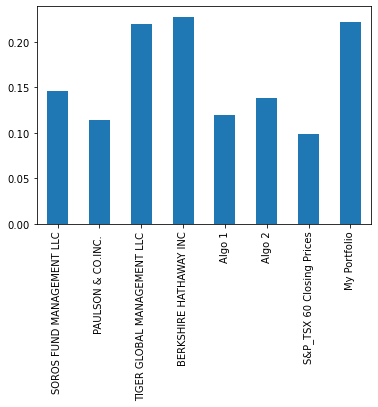

In [68]:
###Calculate Annualzied Sharpe Ratios for each individual portfolio
all_portfolios_sharpe_ratio = all_portfolios.std() * np.sqrt(252)
all_portfolios_sharpe_ratio.plot(kind="bar")

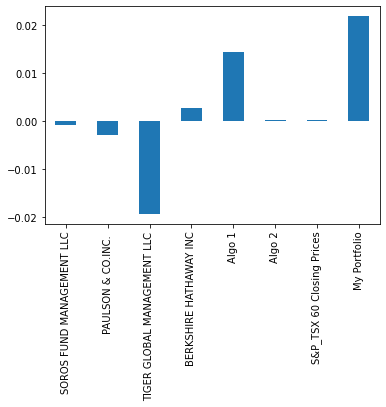

In [69]:
###Averaging sharpe ratios
all_portfolios_avg_sharpe_ratio = all_portfolios.mean() * np.sqrt(252)
all_portfolios_avg_sharpe_ratio.plot(kind="bar")

In [70]:
# Display results
print(all_portfolios_avg_sharpe_ratio)

SOROS FUND MANAGEMENT LLC     -0.000809
PAULSON & CO.INC.             -0.002854
TIGER GLOBAL MANAGEMENT LLC   -0.019271
BERKSHIRE HATHAWAY INC         0.002807
Algo 1                         0.014377
Algo 2                         0.000186
S&P_TSX 60 Closing Prices      0.000216
My Portfolio                   0.021890
dtype: float64


In [71]:
#How does your portfolio do?
#Write your answer here!
all_portfolios_avg_sharpe_ratio.sort_values()

TIGER GLOBAL MANAGEMENT LLC   -0.019271
PAULSON & CO.INC.             -0.002854
SOROS FUND MANAGEMENT LLC     -0.000809
Algo 2                         0.000186
S&P_TSX 60 Closing Prices      0.000216
BERKSHIRE HATHAWAY INC         0.002807
Algo 1                         0.014377
My Portfolio                   0.021890
dtype: float64

In [72]:
print("My portfolio of SHOP, OTEX and L stocks outperformed the S&P_TSX 60 index, as well as, the Whales portfolios")

My portfolio of SHOP, OTEX and L stocks outperformed the S&P_TSX 60 index, as well as, the Whales portfolios


In [73]:
print("Financial Analysis")
print("----------------------------")
print("The portfolios that outperformed the S&P TSX 60 are: SOROS FUND MANAGEMENT LLC,BERKSHIRE HATHAWAY INC, algorithm 1 and algorithm 2 ")
print("The riskier Portifolio is BERKSHIRE HATHAWAY INC ")
print("The algorithmic 1 outperformed both the market (S&P TSX 60) and the whales portfolios")
print("----------------------------")
print("Beta of My portfolio is:", round(my_beta, 4))
print("----------------------------")
print("------>")
print("My portfolio of SHOP, OTEX and L stocks outperformed the S&P TSX 60 index, as well as, the Whales portfolios")

Financial Analysis
----------------------------
The portfolios that outperformed the S&P TSX 60 are: SOROS FUND MANAGEMENT LLC,BERKSHIRE HATHAWAY INC, algorithm 1 and algorithm 2 
The riskier Portifolio is BERKSHIRE HATHAWAY INC 
The algorithmic 1 outperformed both the market (S&P TSX 60) and the whales portfolios
----------------------------
Beta of My portfolio is: 1.2979
----------------------------
------>
My portfolio of SHOP, OTEX and L stocks outperformed the S&P TSX 60 index, as well as, the Whales portfolios
